# WORKSHOP - ESTATÍSTICA BÁSICA COM R - GRUPO TURING

**Tabela de Conteúdos**
- [Overview da programação em R para o Workshop](#parte0)
    - [Atribuição de valores a variáveis](#valores_variávies)
    - [Tabelas de Dados (dataframes)](#dataframes)
    <br><br>
- [📂 Importando dados em R](#parte1)
    - [Importando um csv](#importando_csv)
    - [Boas práticas em criação de bases de dados](#boas_praticas)
    - [Importando os dados do Workshop](#importando_ws)
    <br><br>
- [📑 Manipulando dados em R](#parte2)
    - [Dados Faltantes](#dados_faltantes)
    - [Deep dive in dplyr](#dplyr)
        - [mutate() - criando novas variáveis](#mutate)
        - [select() - selecionando colunas](#select)
        - [filter() - filtrando a base de dados](#filter)
        - [summarise() - a tabela dinâmica do R](#summarise)
        - [arrange() - alterando a ordem das linhas](#arrange)
        - [Combinando os verbos](#varios_verbos)
        <br><br>
- [📉 Visualizando dados em R](#parte3)
<br><br>
- [🔎 Estatística básica em R](#parte4)
    - [Tipos de dados](#tipos_de_dados)
        - [Dados Qualitativos](#quali)
        - [Dados Quantitativos](#quant)
    - [Estatística Descritiva](#descritiva)
        - [Medidas de tendência central](#tendencia_central)
            - [Média](#media)
            - [Mediana](#mediana)
            - [Percentis](#percentil)
            - [Summary](#summary)
        - [Medidas de variação uni e multivariadas](#variacao)
            - [Amplitude](#amplitude)
            - [Amplitude interquartil](#amplitude_interquartil)
            - [Variância](#variancia)
            - [Desvio Padrão](#desv_pad)
            - [Covariância](#covar)
            - [Coeficiente de Correlação](#ccor)
            <br><br>
- [❓ Inferência Estatística em R](#parte5)
    - [Testes de hipótese](#testes_de_hipotese)
        - [Amostra vs População](#amostra_pop)
        - [Testes paramétricos VS Testes não paramétricos](#par_vs_npar)
        - [Teste de Kolgomorov-Smirnov](#ks)
        - Testes Paramétricos
            - [Teste T](#t_test)
            - [ANOVA de um fator](#anova)
        - Testes Não Paramétricos
            - [Wilconx-Mann_Whitney](#wmw)
            - [Kruskal-Wallys](#kw)

## <a id = "parte0"></a> <span style="color: orange;"> Parte 0 - Overview da programação em R para o Workshop</span>
Nessa parte vamos passar pelo básico do básico do básico na programação R.
### <a id = "valores_variávies"></a> Atribuição de valores a variáveis
Em `R` além de usar o clássico `=` para atrbuir valores a variáveis, nós usamos uma setinha `<-`<br>
O comando para "imprimir" alguma coisa é o `print()`. <br>
Caso você queira juntar/ concatenar dois textos separados por espaço, use a função `paste()` <br>
Comentários são coisas escritas no código que são ignoradas pelo computador na hora de executar. No `R` são feitos colocando uma hastag na frente do texto.

In [6]:
a <- 2
print(a)
#isso é um comentário
b <- "Meu nome é"
c <- "Rodolfo"
d <- paste(b,c)
print(d)
print(paste(b,c))
print(paste("o valor de a é:",a))

[1] 2
[1] "Meu nome é Rodolfo"
[1] "Meu nome é Rodolfo"
[1] "o valor de a é: 2"


Vamos dar uma olhada em alguns tipos de variáveis.

In [19]:
um_logico <- FALSE
print(paste("um_lógico:", um_logico))
um_double <- 3.444
print(paste("um_double:", um_double))
um_inteiro <- 5
print(paste("um_inteiro:", um_inteiro))
um_vetor <- c(5,5,3,2)
print("um_vetor:")
print(um_vetor)
uma_string <- "Roberto"
print(paste("uma_string:", uma_string))

[1] "um_lógico: FALSE"
[1] "um_double: 3.444"
[1] "um_inteiro: 5"
[1] "um_vetor:"
[1] 5 5 3 2
[1] "uma_string: Roberto"


### <a id = "dataframes"></a> Tabelas de Dados (dataframes)
Um tipo de variável muito importante para nós nesse workshop são os DataFrames. Os dataframes são basicamente tabelas, só que com um nome mais chique. <br>
Para criar um dataframe, utilize a função `data.frame()` do `R`.

In [14]:
disciplina <- c('Matemática', 'Português', 'Física', 'Geografia', 'Biologia')
nota <- c(7.5,5,8,7.5,6)
notas_e_disciplinas <- data.frame(disciplina,nota)

Para visualizar nosso dataframe, podemos usar o print normalmente. O resultado será o mesmo esteja você no jupyter-notebook, no RStudio ou em qualquer outro lugar.
<br>
Agora, o jupyter é feito especialmente pensando-se em trabalhar com dados. Então usando a função `head()` (em que você especifica quantas linhas quer imprimir) ou simplmesmente digitando o nome do dataframe, ele será impresso de uma forma mais bonita.

In [16]:
print(notas_e_disciplinas)

  disciplina nota
1 Matemática  7.5
2  Português  5.0
3     Física  8.0
4  Geografia  7.5
5   Biologia  6.0


In [18]:
notas_e_disciplinas

disciplina,nota
<fct>,<dbl>
Matemática,7.5
Português,5.0
Física,8.0
Geografia,7.5
Biologia,6.0


In [17]:
head(notas_e_disciplinas, 3)

,disciplina,nota
,<fct>,<dbl>
1,Matemática,7.5
2,Português,5.0
3,Física,8.0


#### Selecionando colunas do dataframe

In [21]:
notas_e_disciplinas$nota

[1] 7.5 5.0 8.0 7.5 6.0

In [22]:
notas_e_disciplinas$disciplina

[1] Matemática Português  Física     Geografia  Biologia  
Levels: Biologia Física Geografia Matemática Português

## <a id = "parte1"></a> <span style="color: orange;"> Parte 1 - Importando dados em R </span>

Quando vamos fazer nossa análise de dados, comumente devemos trazer esses dados de algum outro arquivo, o que nos pede um pouco de cuidado. <br> Por exemplo, é importante sabermos qual é o tipo de arquivo que estamos importando, pois isso pode fazer nosso programa ler os dados errôneamente. <br> Um dos formatos mais comums para a análise de dados é o **CSV**, ou *Comma separeted values*.

![img](img/csv_meme.jpg)

### <a id="importando_csv"></a>Importando um arquivo CSV 

```R
mydata <- read.csv("Data.csv", header=TRUE)
```

```mydata``` é o nome da variável que atribuiremos o conteúdo do arquivo que estamos lendo <br>
```read.csv``` lê arquivos que possuem este formato<br>
O nome do arquivo deve vir dentro de aspas (simples ou dupla). Neste caso o arquivo está no mesmo diretório em que o nosso programa está sendo salvo, por isso não há necessidade de especificar diretórios anteriores. <br>
```header=TRUE``` que significa que a primeira linha do nosso arquivo contém o nome das colunas.

### Alguns problemas 

Caso o arquivo esteja em um diretório diferente, é necessário identificá-lo. <br>
Além disso, caso a primeira linha já contenha dados, vc deve trocar o argumento por ```header=FALSE```. <br>
No caso do separador não ser a vírgula, podemos usar o argumento  ```sep=" "``` como o separador desejado. <br>
Vamos ver um exemplo com esses casos juntos:

```R
mydata <- read.csv("C:/Usuarios/Caminho/do/arquivo/Data.csv", header=FALSE, sep=";")
```

```R
names(mydata) <- c('id','name','type')
```

## <a id="boas_praticas"></a> Boas Práticas 

Caso você não queira ter problemas na hora de importar dados para fazer suas análises, são necessárias algumas boas práticas na hora de criar seu arquivo.

Neste WorkShop, usaremos o dataset Adults, que possui dados do censo norte americano sobre fatores socioeconômicos. Vamos visualizá-lo no Excel para entender sua estrutura:

![img2](img/excel_fifa.png)

```
"","sofifa_id","short_name","long_name","age","nationality","club","wage_eur","player_positions","preferred_foot"
"2600",223152,"S. Vilakazi","Sibusiso Vilakazi",29,"South Africa","South Africa",0,"CAM, CF, RW","Right"
"11493",244742,"A. Ivan","Andreas Ivan",24,"Romania","New York Red Bulls",2000,"RM, LM","Left"
"11171",248710,"Paulino","Paulino de la Fuente GÃ³mez",22,"Spain","Deportivo AlavÃ©s",5000,"RM, CAM","Left"
"5780",245598,"I. Baba","Iddrisu Baba Mohammed",23,"Ghana","RCD Mallorca",9000,"CDM, CM","Right"

```

Datasets também podem ser montados num simples arquivo de texto:

### Como escrever então seu arquivo de dados?

1. Comece pela primeira linha e primeira coluna, ou seja, não pule células
2. Inclua uma linha de títulos para cada coluna
3. Tenha certeza que o número de títulos é igual ao número de colunas dos seus dados
4. Não junte células, isso pode fazer seu programa ter problemas na hora de ler o arquivo
5. No caso de arquivos de texto, use preferencialmente ```,``` como separador dos dados

## <a id="importando_ws"></a> Importando o arquivo do Workshop 

In [1]:
mydata <- read.csv("fifa_sample_wsR.csv", header=TRUE)
head(mydata, 5)

,X,sofifa_id,short_name,long_name,age,nationality,club,wage_eur,player_positions,preferred_foot
,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>
1,2600,223152,S. Vilakazi,Sibusiso Vilakazi,29,South Africa,South Africa,0,"CAM, CF, RW",Right
2,11493,244742,A. Ivan,Andreas Ivan,24,Romania,New York Red Bulls,2000,"RM, LM",Left
3,11171,248710,Paulino,Paulino de la Fuente Gómez,22,Spain,Deportivo Alavés,5000,"RM, CAM",Left
4,5780,245598,I. Baba,Iddrisu Baba Mohammed,23,Ghana,RCD Mallorca,9000,"CDM, CM",Right
5,17256,247856,B. Nieto,Byron Nieto,21,Chile,CD Antofagasta,1000,"RM, RB",Right


Note que por padrão, R lê seu arquivo CSV como se fosse separado por ```,``` <br>
O que acontece então se usarmos outro separador?

In [2]:
mydata <- read.csv("fifa_sample_wsR.csv", header=TRUE, sep=";")
head(mydata, 5)

X.sofifa_id.short_name.long_name.age.nationality.club.wage_eur.player_positions.preferred_foot
"2600,223152,S. Vilakazi,Sibusiso Vilakazi,29,South Africa,South Africa,0,CAM, CF, RW,Right"
"11493,244742,A. Ivan,Andreas Ivan,24,Romania,New York Red Bulls,2000,RM, LM,Left"
"11171,248710,Paulino,Paulino de la Fuente GÃ³mez,22,Spain,Deportivo AlavÃ©s,5000,RM, CAM,Left"
"5780,245598,I. Baba,Iddrisu Baba Mohammed,23,Ghana,RCD Mallorca,9000,CDM, CM,Right"
"17256,247856,B. Nieto,Byron Nieto,21,Chile,CD Antofagasta,1000,RM, RB,Right"


<img src="img/surprised_face.jpg" width="300"/>

In [1]:
fifa <- read.csv("fifa_sample_wsR.csv", header=TRUE)
head(fifa)

X,sofifa_id,short_name,long_name,age,height_cm,weight_kg,nationality,club,wage_eur,player_positions,preferred_foot
1813,224599,Yan Junling,é¢œéªå‡Œ,28,191,83,China PR,Shanghai SIPG FC,13000,GK,Right
12287,243530,Mujaid,Mujaid Sadick Aliu,19,180,75,Spain,Deportivo de La CoruÃ±a,1000,"CB, RB",Right
4257,202676,A. Taggart,Adam Taggart,26,183,70,Australia,Suwon Samsung Bluewings,6000,"ST, CF",Right
8794,241187,L. Geertruida,Lutsharel Geertruida,18,180,75,Netherlands,Feyenoord,1000,"CB, CDM, RB",Right
3851,193254,C. Trimmel,Christopher Trimmel,32,189,82,Austria,1. FC Union Berlin,24000,RB,Right
15820,180181,K. Browne,Kenny Browne,32,191,86,Republic of Ireland,Waterford FC,1000,CB,Left


## <a id = "parte2"></a><span style="color: orange;"> Parte 2 - Manipulação de dados em R </span>

A linguagem R tem como um de seus grandes destaques o pacote Tidyverse.<br>
Para falar a verdade, o Tidyverse não é um pacote em si, mas sim um conjunto de pacotes.<br>
Dentro dele, encontramos o `dplyr`, que é instalado automaticamente com o `install.packages("tidyverse")`.
<br>
Aqui uma [Cheat Sheet do dplyr](https://github.com/rstudio/cheatsheets/blob/master/data-transformation.pdf)
<br>

In [9]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### <a id="dados_faltantes"></a>Dados faltantes
<br>
Dados faltantes podem ser um grande problema quando estamos lidando com uma base de dados. Assim, uma abordagem geralmente aplicada é simplesmente removê-los da sua base de dados. No R, muitas funções (a grande maioria delas) exibe um parâmetro `na.rm` que abrevia "remover NAs" ou *not available* .

In [94]:
#definimos aqui um vetor, vamos ver o que acontece quando aplicamos a função mean()  a ele
vetor <- c(2, 3, 4, 5, NA, 7)
print(mean(vetor))

[1] NA


In [95]:
#Agora com o na.rm = TRUE
print(mean(vetor, na.rm=TRUE))

[1] 4.2


Outra coisa que podemos querer fazer é inputar algum dado padrão aos dados faltantes, isso pode ser feito da seguinte maneira:

In [96]:
vetor[is.na(vetor)] <- 0
print(vetor)

[1] 2 3 4 5 0 7


In [97]:
vetor <- c(2, 3, 4, 5, NA, 7)
vetor[is.na(vetor)] <- mean(vetor, na.rm=TRUE)
print(vetor)

[1] 2.0 3.0 4.0 5.0 4.2 7.0


Vamos dar uma olhada na nossa tabela da Fifa, vamos ver se ela tem algum dado faltante.

In [12]:
#Calculando a quantidade de dados faltantes
sum(is.na(fifa))

[1] 0

Como não há dados faltantes, não precisamos nos preocupar.

### <a id="dplyr"></a>Deep dive in dplyr
Vamos agora nos aprofundar na biblioteca `dplyr`. <br>
Essa biblioteca é boa porque deixa o nosso código extremamente legível para um ser humano.<br>
Isso ocorre porque ela usa uma estrutura de "verbos" que regem o que será feito com a base de dados.<br>
Os verbos existentes na biblioteca são os seguintes:
1. `mutate()` - que adiciona novas variáveis (colunas) ao dataset a partir de operações/ aplicação de funções nas variáveis existentes 
2. `select()` - seleciona as colunas com base em critérios de nome
3. `filter()` - filtra os dados com base em valores.
4. `summarise()` - reduz um grande número de valores para valores resumo (como média, contagem, desvio, etc). Para quem mexe com excel, aqui seria algo para criar uma tabela dinâmica (pivot table). Em geral é usado com `group_by()`
5. `arrange()`- muda a ordenação das linhas com base em algum critério
<br>
<br>
Todos esses verbos podem ser performados tendo como critério um grupo, usando o `group_by()` , mas é mais comum usar isso no `summarise()`. <br>

A estrutura de utilização dos verbos é bem simples: <br>
`base de dados %>% verbo` <br>
Podemos aplicar vários verbos em seguida também, com a seguinte estutura (a ordem de execução será a ordem desses verbos): <br>
`base de dados %>% verbo1 %>% verbo2 %>% verbo3`

Nesse Workshop, não usaremos todas essas funções, assim vamos explicar a que mais iremos usar e depois mostraremos um exemplo com todas as funções juntas para entender seu uso.

#### <a id="filter"></a> `filter()` - Filtrando nossa base de dados!

Vamos supor que você quer analisar sua base de dados e segmentar essa análise com base em algum critério. Isso é só um dos cenários em que pode ser muito importante você usar filtros!<br>
Vamos aqui filtrar a base para ver jogadores com idade acima de 30 anos.

In [16]:
filtro_idade <- fifa %>% filter(age > 30)
filtro_idade[1:5,]

X,sofifa_id,short_name,long_name,age,nationality,club,wage_eur,player_positions,preferred_foot
877,169115,A. Masiello,Andrea Masiello,33,Italy,Atalanta,48000,CB,Right
6343,184944,Charles,Charles Fernando Basilio da Silva,34,Brazil,Antalyaspor,8000,CDM,Right
4510,184337,Go Yo Han,ê³ ìš”í•œ é«˜çº¦ç¿°,31,Korea Republic,FC Seoul,6000,"CM, RM",Right
11008,246719,D. Ojeda,Delio Ojeda,33,Paraguay,Jaguares de CÃ³rdoba,1000,CB,Right
2994,157716,M. Russ,Marco Russ,33,Germany,Eintracht Frankfurt,24000,CB,Right


### <a id="varios_verbos"></a> Usando vários verbos ao mesmo tempo

Uma coisa legal do `dplyr` é que a gente pode usar vários verbos ao mesmo tempo

Aqui vamos pegar uma base apenas com aqueles com **idade abaixo de 37 anos**, depois vamos avaliar as **combinações de nacionalidade e pé preferido** possíves, para cada uma dando sua **máxima idade**. Finalmente, vamos fazer com que os resultados sejam **ordenados da maior idade máxima para a menor**.

In [18]:
fifa %>%
    filter(age < 37) %>%
    group_by(nationality, preferred_foot) %>% 
    summarise(idade_maxima=max(age)) %>%
    arrange(desc(idade_maxima))

nationality,preferred_foot,idade_maxima
England,Right,36
Italy,Right,36
New Zealand,Right,36
Portugal,Right,36
Scotland,Right,36
Brazil,Left,35
Brazil,Right,35
Japan,Right,35
Greece,Right,34
Italy,Left,34


In [8]:
head(fifa)

X,sofifa_id,short_name,long_name,age,height_cm,weight_kg,nationality,club,wage_eur,player_positions,preferred_foot
1813,224599,Yan Junling,é¢œéªå‡Œ,28,191,83,China PR,Shanghai SIPG FC,13000,GK,Right
12287,243530,Mujaid,Mujaid Sadick Aliu,19,180,75,Spain,Deportivo de La CoruÃ±a,1000,"CB, RB",Right
4257,202676,A. Taggart,Adam Taggart,26,183,70,Australia,Suwon Samsung Bluewings,6000,"ST, CF",Right
8794,241187,L. Geertruida,Lutsharel Geertruida,18,180,75,Netherlands,Feyenoord,1000,"CB, CDM, RB",Right
3851,193254,C. Trimmel,Christopher Trimmel,32,189,82,Austria,1. FC Union Berlin,24000,RB,Right
15820,180181,K. Browne,Kenny Browne,32,191,86,Republic of Ireland,Waterford FC,1000,CB,Left


## <a id = "parte3"></a><span style="color: orange;"> Parte 3 - Visualização de dados em R com ggplot2 </span>

__ggplot2__ foi desenvolvido para apresentações gráficas de qualidade em segundos. 

Este pacote é baseado em **gramática de gráficos**, a ideia é que você possa construir qualquer gráfico combinando adequadamente elementos da gramática, do mesmo modo que é feito na língua portuguesa.

### Vantagens

- Baseado em __gramática de gráficos__;
- Alto nível de abstração em plots;
- Flexibilidade;
- Sistema de temas para melhorar aparência de gráficos;
- Muitos usuários ativos na comunidade open source;

### O que não fazer com ggplot2?

- Gráficos de 3 dimensões (vide biblioteca [rgl](https://www.rdocumentation.org/packages/rgl/versions/0.100.50));
- Gráficos iterativos (vide biblioteca [ggvis](https://ggvis.rstudio.com/));
- Gráficos de teoria dos grafos (vide biblioteca [igraph](https://igraph.org/r/));

In [2]:
library(tidyverse) # pacote que vamos usar em quase todas as análises de dados

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Esse warning mostra as funções do tidyverse que conflitam com as funções do R base. Se precisar explicitar de onde a função vem, basta usar a notação ```package::function()```:
```R
# exemplo

ggplot2::ggplot()
```

## Entendendo a lógica do ggplot2


### Códigos base

#### [Inicializando objeto](https://ggplot2.tidyverse.org/reference/ggplot.html)

```R
# exemplo
ggplot(data = fifa)
```

- dados
- mapeamento estético (opcional)

#### [Mapeamento Estético](https://ggplot2.tidyverse.org/reference/aes.html)

```R
# exemplo
aes(x = age, y = wage_eur)
```

- atribui variáveis aos eixos;
- adicionar detalhes (cores, contorno, preenchimento, ...)

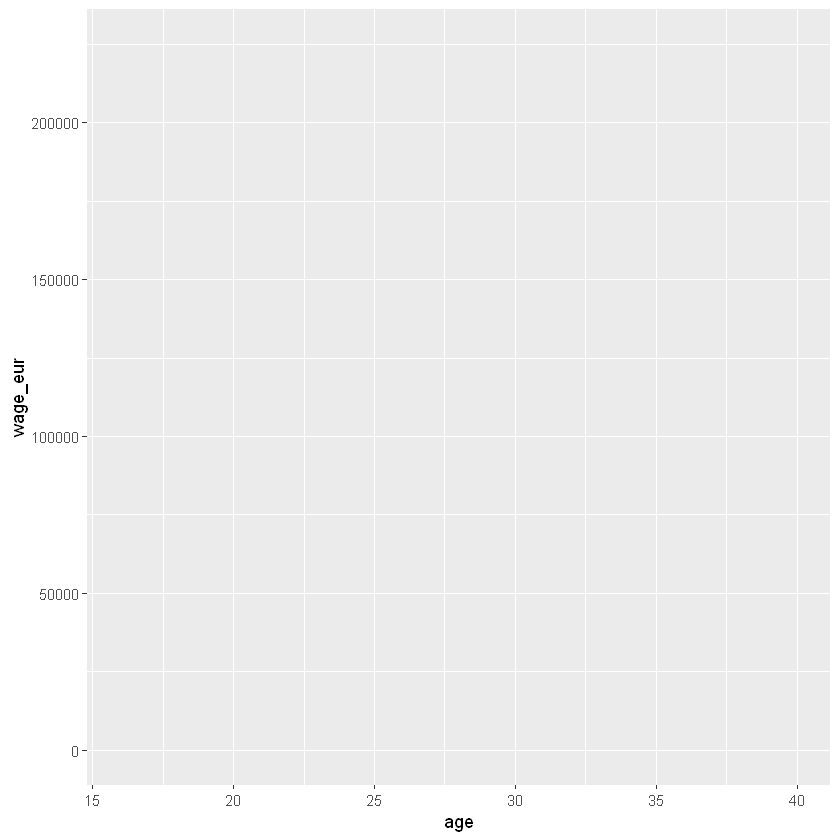

In [3]:
# exemplo teste com ggplot e aes
ggplot(data = fifa, mapping = aes(x = age, y = wage_eur))

#### [Geometrias](https://ggplot2.tidyverse.org/reference/index.html#section-layer-geoms)

- Gráfico de barras - geom_bar()
- Histograma - geom_histogram()
- Dispersão - geom_point() ou geom_jitter()

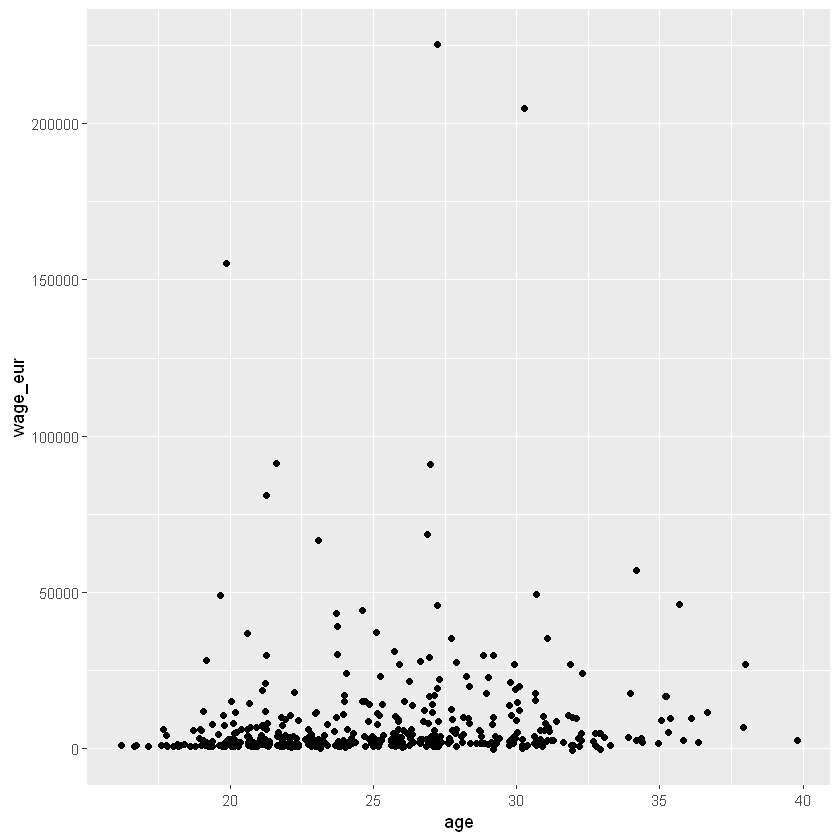

In [5]:
# exemplo teste com geom_jitter
ggplot(data = fifa, mapping = aes(x = age, y = wage_eur)) + geom_jitter()

#### [O CheatSheet do ggplot2](https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf)

### Boas Práticas de Visualização de Dados

- Títulos
- Nome dos Eixos
- Unidades dos eixos

```R
# inserindo textos nos graficos
labs(
    x = "Idade", y = "Salário (Euros)",
    title = "Idade X Salário"
)
```

- Cores

```R
aes(
    #color = preferred_foot,
    color = "red",
)
```

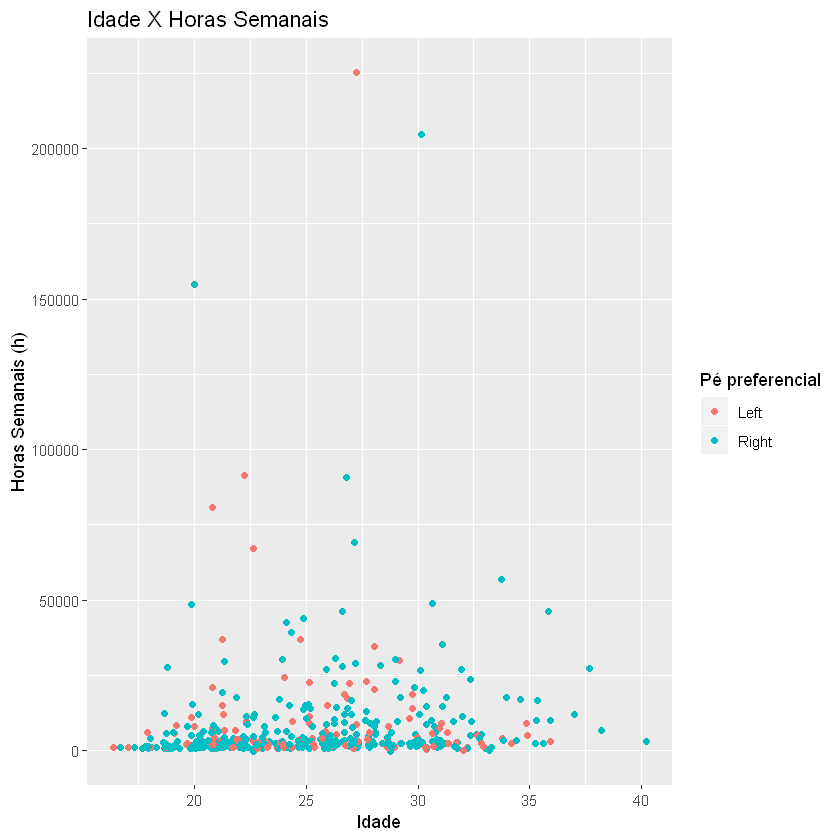

In [9]:
# exemplo teste com nomes dos eixos e cores
ggplot(data = fifa, mapping = aes(x = age, y = wage_eur)) + 
  geom_jitter(mapping = aes(color = preferred_foot)) +
  labs(
    x = "Idade", y = "Horas Semanais (h)",
    title = "Idade X Horas Semanais", color = "Pé preferencial"
)

### Distribuição dos dados

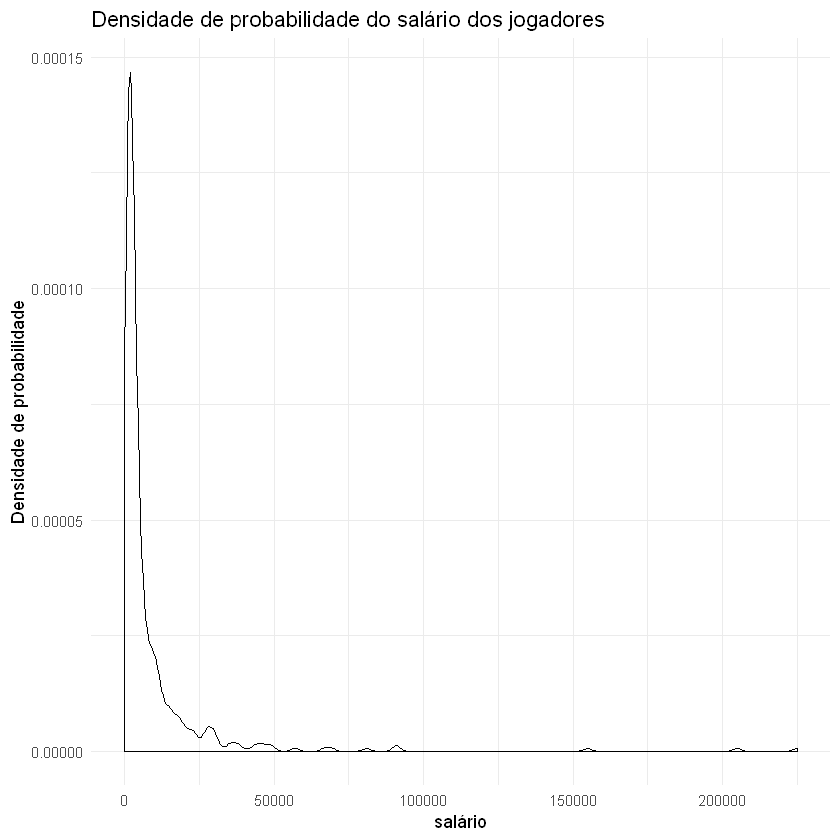

In [17]:
# Distribuição do salário dos jogadores
ggplot(data = fifa, mapping = aes(x = wage_eur)) + 
  geom_density(kernel="gaussian") +
  theme_minimal() +
  labs(y = "Densidade de probabilidade", x = "salário", title = "Densidade de probabilidade do salário dos jogadores")

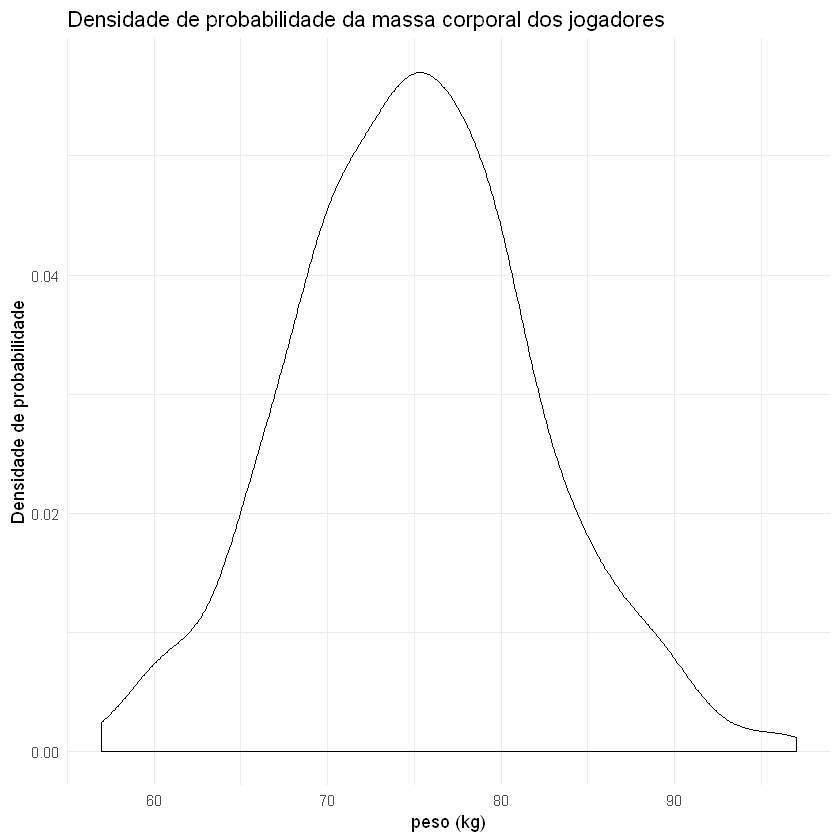

In [18]:
# Distribuição do salário dos jogadores
ggplot(data = fifa, mapping = aes(x = weight_kg)) + 
  geom_density(kernel="gaussian") +
  theme_minimal() +
  labs(y = "Densidade de probabilidade", x = "peso (kg)", title = "Densidade de probabilidade da massa corporal dos jogadores")

### Variáveis Categóricas

In [13]:
# quebrando dados agrupados na variável player position
fifa2 <- fifa %>% 
    mutate(player_positions = strsplit(as.character(player_positions), ", ")) %>% 
    unnest(player_positions)

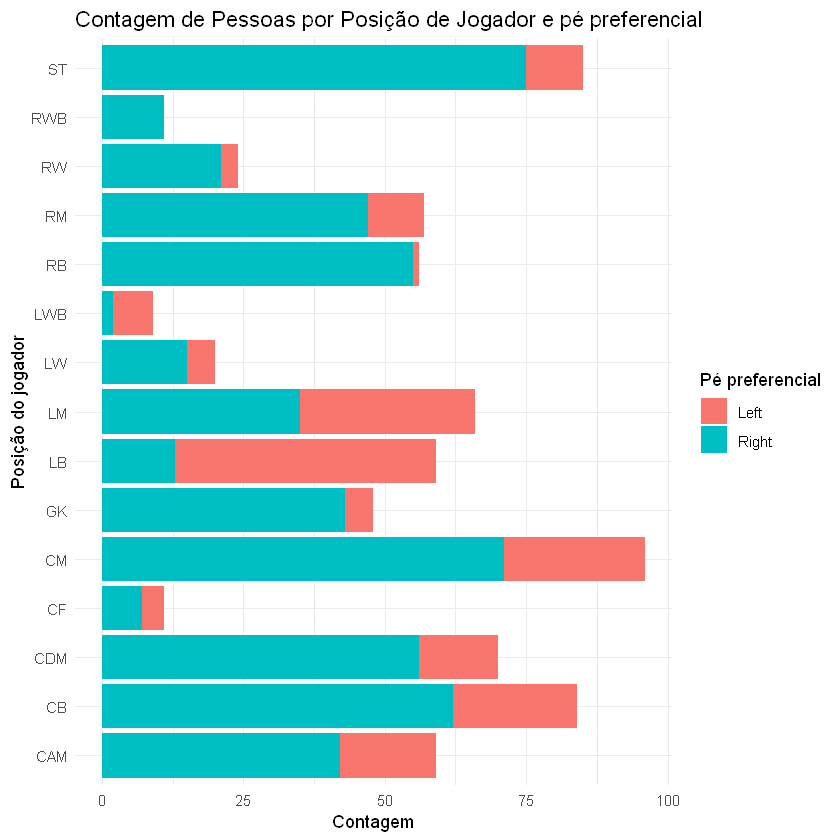

In [15]:
# Número de pessoas por preferência de pé
ggplot(data = fifa2, mapping = aes(x = player_positions)) +
 geom_bar(aes(fill = preferred_foot), position = "stack") + 
 theme_minimal() + coord_flip() +
 labs(
     x = "Posição do jogador", y = "Contagem", fill = "Pé preferencial",
     title = "Contagem de Pessoas por Posição de Jogador e pé preferencial"
 )

### Variáveis contínuas

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


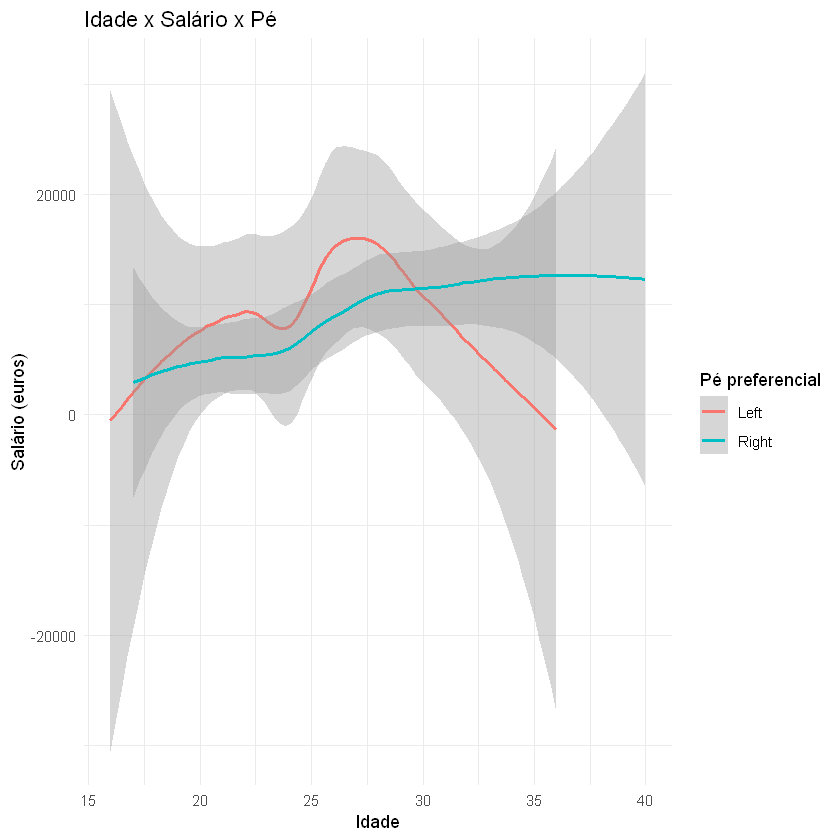

In [20]:
# ajuste de curva renda x horas semanais x idade
ggplot(data = fifa, mapping = aes(x = age, y = wage_eur)) + 
  geom_smooth(mapping = aes(color = preferred_foot), method = "auto") +
  theme_minimal() + 
  labs(
      x = "Idade", y = "Salário (euros)", color = "Pé preferencial",
      title = "Idade x Salário x Pé"
  )


## <a id = "parte4"></a><span style="color: orange;">  Parte 4 - Estatística Básica em R </span>

Agora que já vimos o básico de importação de dados em **R**, estamos prontos para entender como essa linguagem é utilizada efetivamente para fazer análises estatísticas!

Mas não se preocupe, vamos explorando os diversos temas de estatística enquanto aprendemos mais sobre **R**.

## <a id="tipos_de_dados"></a> Tipos de Dados

Um dos pontos base da Estatística consiste em entender nossas informações e como elas elas são organizadas: os **dados**. Esses dados podem ser divididos em dois tipos diferentes: dados **qualitativos** e dados **quantitativos**.

### <a id="quali"></a>Dados Qualitativos

Esses dados representam **categorias** do nosso espaço, ou seja, eles dividem os indivíduos em diversas classes que não se intersectam. Por exemplo, a cor de uma flor é um tipo de dado qualitativo, já que as categoriza em classes como: *'amarelo'*, *'rosa'*, *'vermelho'*, *'azul'*, etc. Esses dados são bem úteis para representar características que não são facilmente descritas por números, como qualidades (daí vem o nome).

In [3]:
# Montando um Dataframe de Cores de Flores

Flor = c("Margarida", "Hortênsia", "Violeta", "Rosa")
Cor = c("Amarelo", "Azul", "Azul", "Vermelho")
flores = data.frame(Flor, Cor)
flores

Flor,Cor
Margarida,Amarelo
Hortênsia,Azul
Violeta,Azul
Rosa,Vermelho


In [4]:
# Mostrando as flores de cor Azul

flores %>% filter(Cor == "Azul")

Flor,Cor
Hortênsia,Azul
Violeta,Azul


### <a id="quant"></a> Dados Quantitativos

São tipos de dados **numéricos**, ou seja, são mensuráveis e podem ser manipulados matematicamente. Essa categoria engloba os dados representáveis por números, como a altura de uma pessoa ou a área de um terreno. Esses dados são mais versáteis, já que conseguimos fazer comparações, médias e outros tipos de operações aritméticas que não são possíveis com os dados qualitativos.

In [5]:
# Montando um Dataframe de Altura de Pessoas

Nome = c("Marcela", "Alexandre", "Rafaela", "Mariana", "Victor")
Altura = c(161, 184, 172, 174, 169)
alturas = data.frame(Nome, Altura)
alturas

Nome,Altura
Marcela,161
Alexandre,184
Rafaela,172
Mariana,174
Victor,169


In [6]:
# Selecionando as pessoas com altura maior que 170 cm

alturas %>% filter(Altura > 170)

Nome,Altura
Alexandre,184
Rafaela,172
Mariana,174


## <a id="descritiva"></a>Estatística Descritiva

O tipo de análise estatística mais básico é a **Estatística Descritiva**, que busca simplesmente resumir e descrever os nossos dados da melhor maneira possível. Esse ramo utiliza de diversas medidas para expressar características diferentes dos nossos dados, como veremos a seguir.

### <a id="tendencia_central"></a>Medidas de Tendência Central

As **Medidas de Tendência Central** procuram representrar um valor central em torno do qual os dados se agrupam. Você provavelmente já ouviu falar de alguns exemplos desse tipo de medida, como a **média** e a **mediana**.

#### <a id="media"></a> Média

A **Média** é a medida numérica que representa a posição central dos nossos dados. Seu valor é obtido ao dividir a soma de todos os nossos dados pela sua quantidade.

$$\large \bar x ={\frac {1}{N}}\sum _{i=1}^{N}x_{i}$$

In [7]:
# Média de salário dos jogadores

mean(fifa$wage_eur)

[1] 8929.825

In [8]:
# Média de salário por pé utilizado

fifa %>% group_by(preferred_foot) %>%
     summarise(mean_wage = mean(wage_eur))

# Os canhotos, em média, ganham mais que os destros

preferred_foot,mean_wage
Left,12036.70
Right,7953.89


In [9]:
# Não é possível calcular a média de dados qualitativos

mean(fifa$preferred_foot)

Warning message in mean.default(fifa$preferred_foot):
"argument is not numeric or logical: returning NA"

[1] NA

#### <a id="mediana"></a>Mediana

A **Mediana** é a medida numérica que representa o dado que se encontra na metade da nossa distribuição quanto esta se encontra ordenada. Ou seja, a mediana é o valor que divide os nossos dados de tal forma que metade deles sejam maiores que a mediana e a outra metade seja menor.

In [11]:
# Mediana da idade dos jogadores

median(fifa$age)

[1] 24

In [12]:
# Não é possível calcular a mediana de dados qualitativos

median(fifa$nationality)

ERROR: Error in median.default(fifa$nationality): need numeric data


#### <a id="percentil"></a>Percentil

O **Percentil** não é uma medida de tendência central, mas se relaciona bastante com a Mediana. Os percentis são medidas que dividem as nossas amostras tal que **p%** delas sejam menores que o percentil. O **50º percentil**, portanto, é a nossa já conhecida mediana, enquanto o **25º percentil** é denominado primeiro quartil.

In [13]:
# Obtendo os quartis do salário dos jogadores

quartis = quantile(fifa$wage_eur)

# Transpondo o resultado para ficar mais visualizável
t(quartis)

0%,25%,50%,75%,100%
0,1000,2000,8000,215000


In [14]:
# Obtendo os percentis 30%, 60% e 90% do salário dos jogadores

percentis = quantile(fifa$wage_eur, c(.30, .60, .90))

# Transpondo o resultado para ficar mais visualizável
t(percentis)

30%,60%,90%
1000,4000,23000


#### <a id="summary"></a> Summary

Uma maneira bem simples de mostrar vários dos valores que vimos até agora é utilizando a função ```summary()```. Ela nos apresenta o *mínimo*, o *1º quartil*, a *mediana*, a *média*, o *3º quartil* e o *máximo* da variável em questão, da seguinte forma:

In [15]:
# Resumo do salário dos jogadores

summary(fifa$wage_eur)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1000    2000    8930    8000  215000 

### <a id="variacao"></a> Medidas de Variação

As **Medidas de Variação** medem o *grau de afastamento* dos dados em torno de um valor central. Elas são importantes para medir a homogeneidade dos dados, indicando se nossas amostras estão próximas entre si ou muito afastadas.

#### <a id="amplitude"></a> Amplitude

A medida mais simples de variação é a **Amplitude**, que mede simplesmente a diferença entre a maior e a menor amostra. Entretanto, essa medida é bem sensível outliers em suas extremidades.

$$ \large A =  x_{max} - x_{min} $$

In [16]:
# Calculando a amplitude do salário dos jogadores

amplitude = max(fifa$wage_eur) - min(fifa$wage_eur)

amplitude

[1] 215000

#### <a id="amplitude_interquartil"></a> Amplitude Interquartil

Uma outra medida de variação mais precisa é a **Amplitude Interquartil**, definida como a diferença entre o 3º e o 1º quartil. Por desprezar os valores mais extremos, essa medida é menos sujeita a flutuações que a amplitude normal.

In [17]:
# Revendo os quartis do salário dos jogadores

quartis = quantile(fifa$wage_eur)
t(quartis)

0%,25%,50%,75%,100%
0,1000,2000,8000,215000


In [18]:
# Calculando a amplitude interquartil do salário dos jogadores

IQR(fifa$wage_eur)

[1] 7000

#### <a id="variancia"></a> Variância

A **Variância** é uma medida de variação que mensura a dispersão das amostras com relação à média.

Seu valor é obtido a partir do cálculo da média do quadrado das diferenças entre os dados e a média, da seguinte forma:
<br>
<br>

$$\large s^2 = {\frac{\sum_{i=1}^{N}(x_{i} -\bar{x})^2}{N-1}}$$

In [19]:
# Calculando a variância do salário dos jogadores

var(fifa$wage_eur)

[1] 410131328

#### <a id="desv_pad"></a> Desvio Padrão

O **Desvio Padrão** é uma outra medida de variação obtida simplesmente pela raiz quadrada da variância. Essa raiz é feita para que a unidade de medida seja a mesma dos nossos dados.
<br>
<br>

$$\large s = \sqrt{\frac{\sum_{i=1}^{N}(x_{i} -\bar{x})^2}{N-1}}$$

In [20]:
# Calculando o desvio padrão do salário dos jogadores

sd(fifa$wage_eur)

[1] 20251.7

#### <a id="covar"></a> Covariância

A **Covariância** é a medida da *relação linear* entre duas variáveis: seu valor representa o quanto elas "caminham juntas". Se a covarância é positiva, significa que as duas crescem juntas; se a covariância é negativa, significa que conforme uma cresce, a outra decresce.

Seu valor é obtido da seguinte forma:
<br>

$$\large s_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$$

In [21]:
# Calculando a covarância entre a idade e o salário dos jogadores

cov(fifa$age, fifa$wage_eur)

[1] 19168.73

A covariância positiva significa que quanto maior a idade do jogador, maior é a chance dele ganhar mais.

#### <a id="ccor"></a>Coeficiente de Correlação

O **Coeficiente de Correlação** também mede a relação linear entre duas variáveis, mas é obtida a partir da divisão da covariância pelos desvios padrões individuais de cada variável. Dessa forma, encontramos uma medida **normalizada** da relação entre as duas. 
<br>
<br>

$$\large r_{x,y}= \frac{s_{x,y}}{s_{x} s_{y}}$$

Quanto mais próximo de 1, maior a _relação linear positiva_ entre as duas variáveis, e seu gráfico se aproxima de uma linha reta _crescente_. Quanto mais próximo de -1, maior a _relação linear negativa_ entre as duas variáveis, e seu gráfico se aproxima de uma linha reta _decrescente_. Quando seu valor é próximo de 0, não existe uma relação muito grande entre as duas variáveis.

In [22]:
# Calculando o coeficiente de correlação entre a idade e o salário dos jogadores

cor(fifa$age, fifa$wage_eur)

[1] 0.202818

A idade dos jogadores tem uma relação linear positiva razoável com seu salário.

## <a id = "parte5"></a><span style="color: orange;"> Parte 5 - Inferência Estatística em R </span>

In [3]:
fifa <- read.csv("fifa_sample_wsR.csv", header=TRUE)

### <a id="testes_de_hipotese"></a>Testes de Hipótese
Muitas vezes, quando estamos fazendo alguma análise, queremos provar que **duas médias são diferentes**. <br>
Por exemplo, temos dois grupos de pacientes, um que tomou analgésico e outro que tomou um placebo, e queremos saber se existe diferença na nota que eles atribuem para sua dor antes e depois de tomar o remédio/placebo. <br>
<br>
Esse é o típico cenário em que devemos aplicar um **teste de hipótese**.
<br>
#### <a id="amostra_pop"></a> Amostra vs População
![censovssample](img/census-vs-sample.jpg)
Os testes de hipótese precisam ser feitos porque, muitas vezes, nós não temos a totalidade dos dados e sim uma **amostra**.
<br> <br>

### Hipóteses e p-valor

Existem teoremas matemáticos que garantem que as médias tiradas de amostras aleatorias de uma população convergem para a própria média da população.
Mas pode ser que, por acaso, vc tenha pegado uma amostra extrema que não representa essa população - **os testes de hipótese são uma forma de verificar qual é essa probabilidade e se ela é considerável**.
Os **testes de hipóteses** têm uma estrutura comum. Eles assumem uma *hipótese nula* e uma *hipótese alternativa*.<br>
Em geral: <br>
$H_0 =$ (hipótese nula) as médias são iguais <br>
$H_A =$ (hipótese alternativa) as médias são diferentes (você pode mudar isso para "maior" ou "menor" também
<br>
O que o teste de hipótese nos retorna é o **p-valor**, ele nos dá **a probabilidade de cometer um erro ao falar que $H_A$ está certa** . <br>
Em geral, quando o $p-valor \leq 0.05$ aceitamos $H_A$, pois a probabilidade de "estarmos falando besteira" é menor do que 5%

![erros](img/erros.png)

#### <a id="par_vs_npar"></a> Testes paramétricos VS não-paramétricos
![distribuicaonormal](img/normal.jpeg)
Os testes de hipótese podem ser divididos entre paramétricos e não paramétricos.
<br>
Os testes **paramétricos** assumem a **distribuição normal dos dados**, enquanto os **não paramétricos** não possuem tal premissa.<br>
A distribuição normal é a famosa curva de sino, em que a maioria dos valores estão próximos de uma média.
#### <a id="ks"></a> Kolgomorov-Smirnov
Para saber se devemos ou não aplicar um teste paramétrico ou não paramétrico, precisamos saber se nossos dados seguem ou não uma distribuição normal. Para isso usamos o teste de *Kolgomorov-Smirnov* comparando a nossa amostra com uma distribuição normal.
Nesse teste, as hipóteses são as seguintes:<br>
$H_0 = $ a distribuição é normal <br>
$H_A = $ a distribuição não é normal


Aplicando o ks nas variáveis da base fifa:

In [4]:
ks.test(fifa$height_cm,"pnorm", mean(fifa$height_cm), sd(fifa$height_cm))

Warning message in ks.test(fifa$height_cm, "pnorm", mean(fifa$height_cm), sd(fifa$height_cm)):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  fifa$height_cm
D = 0.049348, p-value = 0.2167
alternative hypothesis: two-sided


Parece que **a altura dos jogadores $\huge {não}$ pode ser considerada $\huge {não}$ normal!**

In [5]:
ks.test(fifa$wage_eur,"pnorm", mean(fifa$wage_eur), sd(fifa$wage_eur))

Warning message in ks.test(fifa$wage_eur, "pnorm", mean(fifa$wage_eur), sd(fifa$wage_eur)):
“ties should not be present for the Kolmogorov-Smirnov test”



	One-sample Kolmogorov-Smirnov test

data:  fifa$wage_eur
D = 0.34009, p-value < 2.2e-16
alternative hypothesis: two-sided


Parece que **o salário dos jogadores pode ser considerado $\huge {não}$ normal!**

#### <a id="ttest"></a> Teste T
Existem dois testes mais conhecidos para comparar médias, o teste T e o teste Z. O teste Z é mais usado para comparar uma média amostral com uma média teórica, apesar de poder ser usado para comparar duas médias amostrais também. <br>
O teste Z não é nativo do R, mas aceitando-se $H_A$ de teste T = também aceitaria-se ela via teste Z
<br>
Vamos aqui aplicar um teste que compara as médias, o teste t. A hipótese nula é de que as médias são iguais e a alternativa é de que são diferentes. <br>
Esse teste precisa saber se as variâncias são iguais ou diferentes. Pra isso vamos aplicar um teste chamado teste F. <br>
Para o teste  F, a hipótese nula é de que as variâncias são diferentes.

In [10]:
destros = fifa %>% filter(preferred_foot == 'Right')
canhotos = fifa %>% filter(preferred_foot == 'Left')

In [12]:
f_test = var.test(destros$height_cm, canhotos$height_cm)
print(paste("Valor p do teste: ", f_test$p.value))

[1] "Valor p do teste:  0.178171087327637"


Como não podemos aceitar que as variâncias são diferentes, vamos prosseguir assumindo homocedasticidade (variâncias iguais)

In [14]:
t_test <- t.test(destros$height_cm, canhotos$height_cm, var.equal = TRUE)
print(paste("Valor p do teste: ", t_test$p.value))

[1] "Valor p do teste:  0.495998016266609"


Não podemos considerar que as alturas são diferentes entre os destros e os canhotos

#### <a id="anova"></a> ANOVA de um fator
Para comparar três ou mais médias, utilizaremos um teste de hipóteses chamado ANOVA (Análise de variância) de um fator<br>
Aqui, a $H_A$ é que *alguma das médias é diferentes da outras*

In [22]:
anova <- aov(height_cm ~ nationality, data = fifa)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)  
nationality  74   4573   61.79   1.392 0.0258 *
Residuals   381  16916   44.40                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Temos que `Pr(>F)` é o nosso valor P, ele foi bem baixo, o que nos leva a concluir que há diferença de alturas entre os jogadores por nacionalidade. Só de curiosidade, vejamos:

In [25]:
fifa_alturas = fifa %>% group_by(nationality) %>% summarise(altura_media = mean(height_cm)) %>% arrange(desc(altura_media))
head(fifa_alturas)

nationality,altura_media
<fct>,<dbl>
Wales,190.00
Finland,189.00
Switzerland,188.00
Gabon,187.00
Australia,186.25
Belgium,186.00


## Não paramétricos - Wilcoxon-Mann-Whitney e Kruskal-Wallis
Técnicas não paramétricas fazem poucas suposições sobre as distribuições originais.
#### <a href="wmw"></a>Wilcoxon-Mann-Whitney
O teste U de Mann-Whitney (também conhecido por teste da soma dos postos de Wilcoxon, teste de Wilcoxon-Mann-Whitney ou teste de Mann-Whitney) é a versão da rotina de teste não-paramétrico de t de Student.

In [19]:
wilcox.test(destros$wage_eur, canhotos$wage_eur)


	Wilcoxon rank sum test with continuity correction

data:  destros$wage_eur and canhotos$wage_eur
W = 18692, p-value = 0.1708
alternative hypothesis: true location shift is not equal to 0


O teste teve $p_{valor}$ bem pequeno, o que nos pode faz concluir que existe diferença entre ganho de capital entre homens e mulheres

#### <a href="kw"></a> Kruskal Wallys
É um teste não paramétrico utilizado para comparar três ou mais populações. Ele é usado para testar a hipótese nula de que todas as populações possuem funções de distribuição iguais contra a hipótese alternativa de que ao menos duas das populações possuem funções de distribuição diferentes.

In [26]:
kruskal.test(wage_eur ~ nationality, data = fifa)


	Kruskal-Wallis rank sum test

data:  wage_eur by nationality
Kruskal-Wallis chi-squared = 130.36, df = 74, p-value = 5.797e-05


O nosso valor P foi bem baixo, o que nos leva a concluir que há diferença de salários entre os jogadores por nacionalidade.